In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
import pandas as pd
import seaborn as sb

In [3]:
dataset = pd.read_csv('cars.csv')

In [4]:
X=dataset.iloc[:,:-1].values

In [5]:
X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']


c:\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [6]:
som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

In [17]:
data = np.genfromtxt('cars.csv', delimiter=',', usecols=(0, 1, 2, 3, 4, 5, 6))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
data
data=data[~np.isnan(data).any(axis=1)]
#for i in X.columns:
 #   print(X[i].isnull().sum())

In [24]:
# Initialization and training
som = MiniSom(7, 7, 7, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
#som.random_weights_init(data)
som.pca_weights_init(data)
print("Training...")
som.train_random(data, 4000)  # random training
print("\n...ready!")


Training...

...ready!


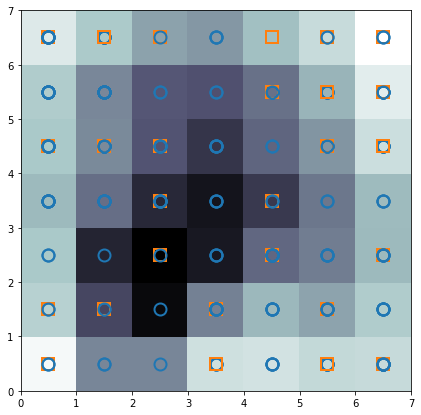

In [25]:
plt.figure(figsize=(7, 7))
# Plotting the response for each pattern
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('cars.csv', delimiter=',', usecols=(7), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == ' US.'] = 0
t[target == ' Japan.'] = 1
t[target == ' Europe'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
#plt.savefig('resulting_images/som_iris.png')
plt.show()

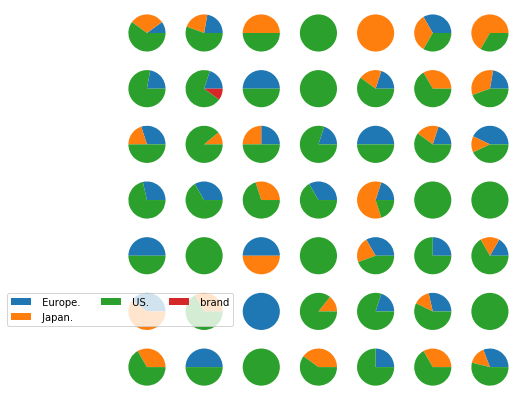

In [26]:
label = np.genfromtxt('cars.csv', delimiter=',', usecols=(7), dtype=str)
labels_map = som.labels_map(data, label)
label_names = np.unique(label)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1), ncol=3)
#plt.savefig('resulting_images/som_iris_pies.png')
plt.show()